In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
df = pd.read_csv("/content/worldpopulationdata.csv")


In [5]:
df.head()

,Series Name,Series Code,Country Name,Country Code,2022,2021,2020,2019,2018,2017,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,41128771.0,40099462.0,38972230.0,37769499.0,36686784.0,35643418.0,...,28189672.0,27385307.0,26427199.0,25903301.0,25442944.0,24411191.0,23553551.0,22645130.0,21000256.0,19688632.0
1,"Population, total",SP.POP.TOTL,Albania,ALB,2775634.0,2811666.0,2837849.0,2854191.0,2866376.0,2873457.0,...,2913021.0,2927519.0,2947314.0,2970017.0,2992547.0,3011487.0,3026939.0,3039616.0,3051010.0,3060173.0
2,"Population, total",SP.POP.TOTL,Algeria,DZA,44903225.0,44177969.0,43451666.0,42705368.0,41927007.0,41136546.0,...,35856344.0,35196037.0,34569592.0,33983827.0,33435080.0,32956690.0,32510186.0,32055883.0,31624696.0,31200985.0
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,44273.0,45035.0,46189.0,47321.0,48424.0,49463.0,...,54849.0,55366.0,55891.0,56383.0,56837.0,57254.0,57626.0,57941.0,58177.0,58324.0
4,"Population, total",SP.POP.TOTL,Andorra,AND,79824.0,79034.0,77700.0,76343.0,75013.0,73837.0,...,71519.0,73852.0,76055.0,78168.0,80221.0,79826.0,76933.0,73907.0,70849.0,67820.0


In [6]:
df.shape

(1085, 26)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

,0
Series Name,0
Series Code,0
Country Name,0
Country Code,0
2022,0
2021,0
2020,0
2019,0
2018,0
2017,0


In [9]:
df['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands',

In [10]:
df['Country Name'].nunique()

217

**Dropping Unnecessary Columns**

In [11]:
df.drop(['Series Name','Country Code'],axis=1,inplace=True)

**TOP 10 COUNTRIES OF TOTAL POPULATION**

In [12]:
total_population_data = df[df['Series Code'] == 'SP.POP.TOTL']


total_population_sorted = total_population_data.sort_values(by="2022", ascending=False)

total_top_ten_countries = total_population_sorted.head(10)
print(total_top_ten_countries[['Country Name']] )

           Country Name
89                India
41                China
206       United States
90            Indonesia
149            Pakistan
144             Nigeria
26               Brazil
15           Bangladesh
161  Russian Federation
127              Mexico


**BAR PLOT OF TOP TEN COUNTRIES POPULATION BETWEEN 2016 AND 2022**

<ipython-input-27-b379cc669eba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="2022", y="Country Name", data=total_top_ten_countries, palette="coolwarm")


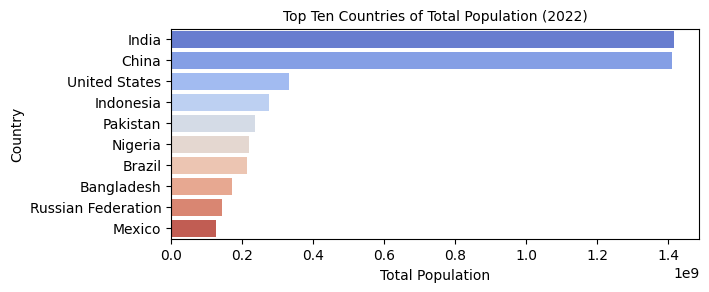

<ipython-input-27-b379cc669eba>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="2016", y="Country Name", data=total_top_ten_countries, palette="coolwarm")


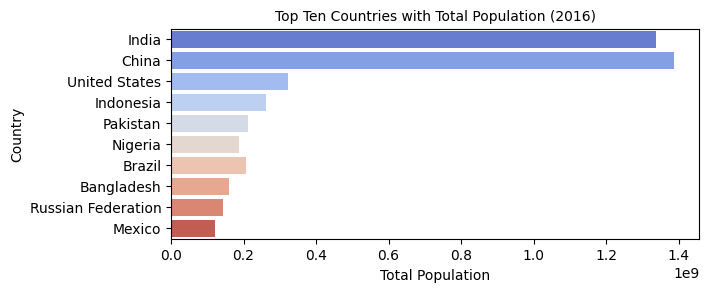

In [27]:
plt.figure(figsize=(15, 6))
plt.subplot(2,2,1)
sns.barplot(x="2022", y="Country Name", data=total_top_ten_countries, palette="coolwarm")
plt.title("Top Ten Countries of Total Population (2022)",fontsize=10)
plt.xlabel("Total Population",fontsize=10)
plt.ylabel("Country",fontsize=10)
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(2,2,2)
sns.barplot(x="2016", y="Country Name", data=total_top_ten_countries, palette="coolwarm")
plt.title("Top Ten Countries with Total Population (2016)",fontsize=10)
plt.xlabel("Total Population",fontsize=10)
plt.ylabel("Country",fontsize=10)
plt.show()

**TOP 5 COUNTRIES WITH HIGHEST MALE POPULATION**

In [28]:
male_population_data = df[df["Series Code"] == "SP.POP.TOTL.MA.IN"]
male_population_sorted = male_population_data.sort_values(by="2022", ascending=False)
male_top_ten_countries = male_population_sorted.head(5)
print(male_top_ten_countries[['Country Name']] )

      Country Name
523          India
475          China
640  United States
524      Indonesia
583       Pakistan


**TOP 5 COUNTRIES WITH HIGHEST FEMALE POPULATION**

In [30]:
female_population_data = df[df["Series Code"] == "SP.POP.TOTL.FE.IN"]
female_population_sorted = female_population_data.sort_values(by="2022", ascending=False)
female_top_ten_countries = female_population_sorted.head(5)
print(female_top_ten_countries[['Country Name']] )

      Country Name
258          China
306          India
423  United States
307      Indonesia
366       Pakistan


**BAR PLOT OF TOP 5 COUNTRIES WITH HIGHEST MALE POPULATION IN 2022**

<ipython-input-29-74a70a32ddfe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="2022", y="Country Name", data=male_top_ten_countries, palette="viridis")


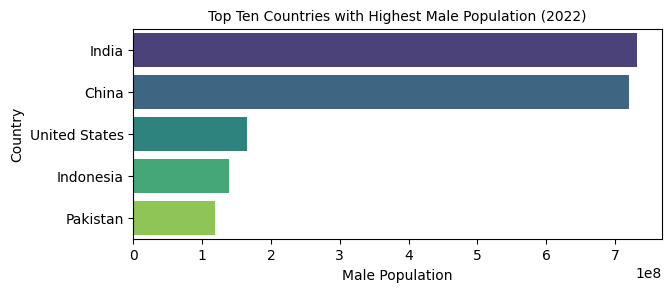

In [29]:
plt.figure(figsize=(15, 6))
plt.subplot(2,2,1)
sns.barplot(x="2022", y="Country Name", data=male_top_ten_countries, palette="viridis")
plt.title("Top Ten Countries with Highest Male Population (2022)",size=10)
plt.xlabel("Male Population",size=10)
plt.ylabel("Country",size=10)
plt.show()

**BAR PLOT OF TOP 5 COUNTRIES WITH HIGHEST FEMALE POPULATION IN 2022**

<ipython-input-31-b658ca1a265f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="2022", y="Country Name", data=female_top_ten_countries, palette="viridis")


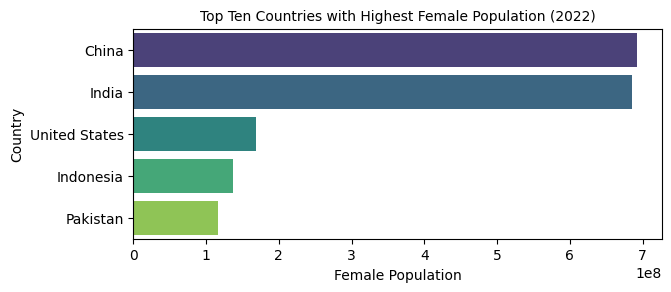

In [31]:
plt.figure(figsize=(15, 6))
plt.subplot(2,2,1)
sns.barplot(x="2022", y="Country Name", data=female_top_ten_countries, palette="viridis")
plt.title("Top Ten Countries with Highest Female Population (2022)",size=10)
plt.xlabel("Female Population",size=10)
plt.ylabel("Country",size=10)
plt.show()